In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pylab as plt

In [2]:
# pip install xgboost

In [3]:
import xgboost as xgb

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
df=pd.read_csv('C:/Users/RISHI/Desktop/module 4/time series/PJME.csv')
df.head()

,Datetime,PJME_MW
0,31-12-2002 01:00,26498
1,31-12-2002 02:00,25147
2,31-12-2002 03:00,24574
3,31-12-2002 04:00,24393
4,31-12-2002 05:00,24860


<AxesSubplot:>

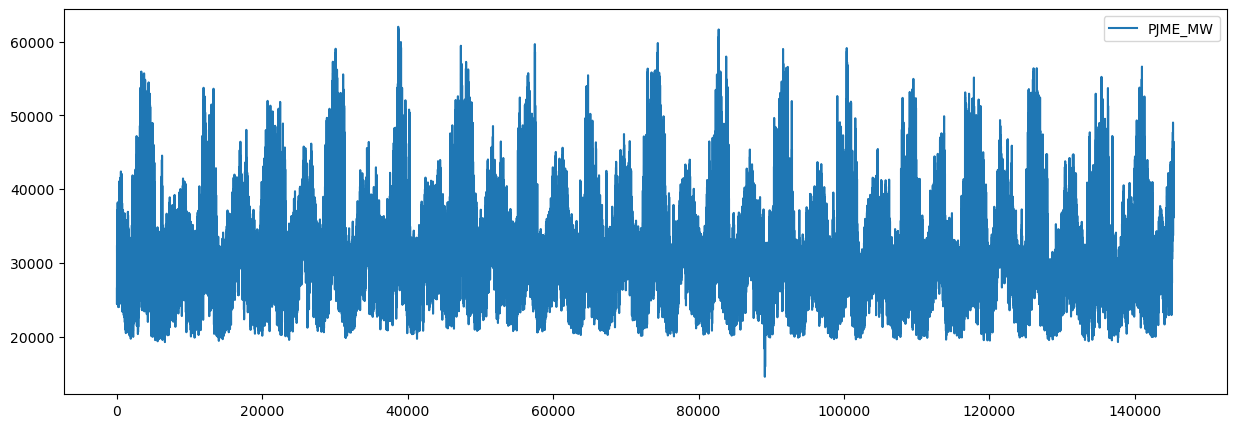

In [6]:
df.plot(figsize=(15,5))

In [7]:
df=df.set_index('Datetime')

In [8]:
df.tail()

,PJME_MW
Datetime,
01-01-2018 20:00,44284
01-01-2018 21:00,43751
01-01-2018 22:00,42402
01-01-2018 23:00,40164
02-01-2018 00:00,38608


<AxesSubplot:xlabel='Datetime'>

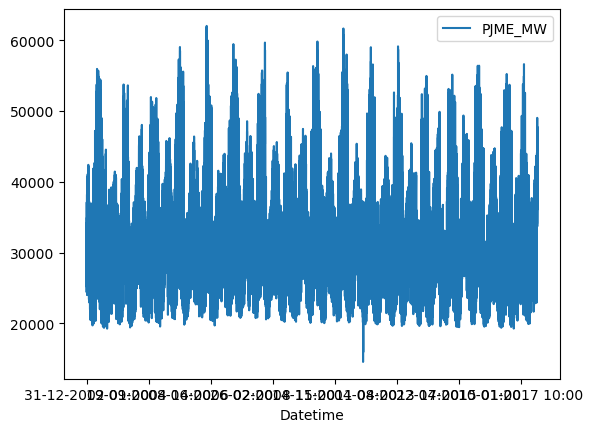

In [9]:
df.plot()
# pd.xticks()

In [10]:
df.index=pd.to_datetime(df.index)

C:\Users\RISHI\AppData\Local\Temp\ipykernel_9456\1954437206.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.index=pd.to_datetime(df.index)


In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Datetime'>

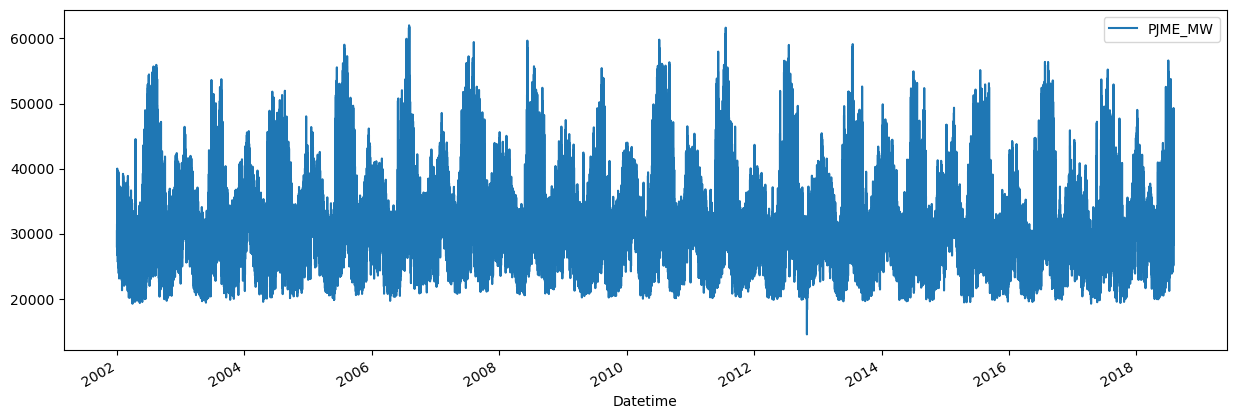

In [11]:
df.plot( figsize=(15,5))

In [12]:
# Train-test split
train = df.loc[df.index < '01-01-2015']
test =  df.loc[df.index >= '01-01-2015']

<AxesSubplot:xlabel='Datetime'>

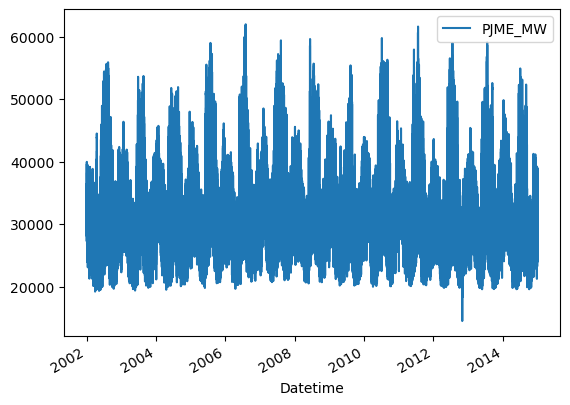

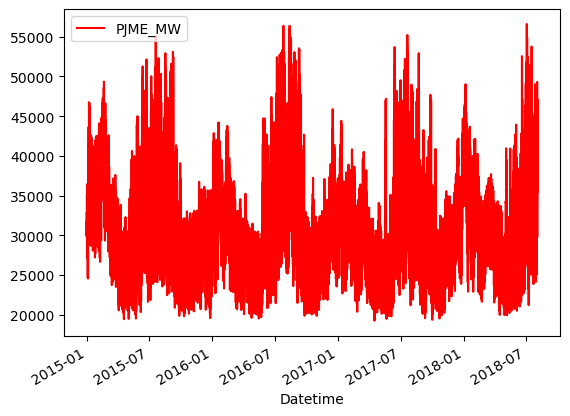

In [13]:
train.plot()
test.plot(color='red')

<AxesSubplot:xlabel='Datetime'>

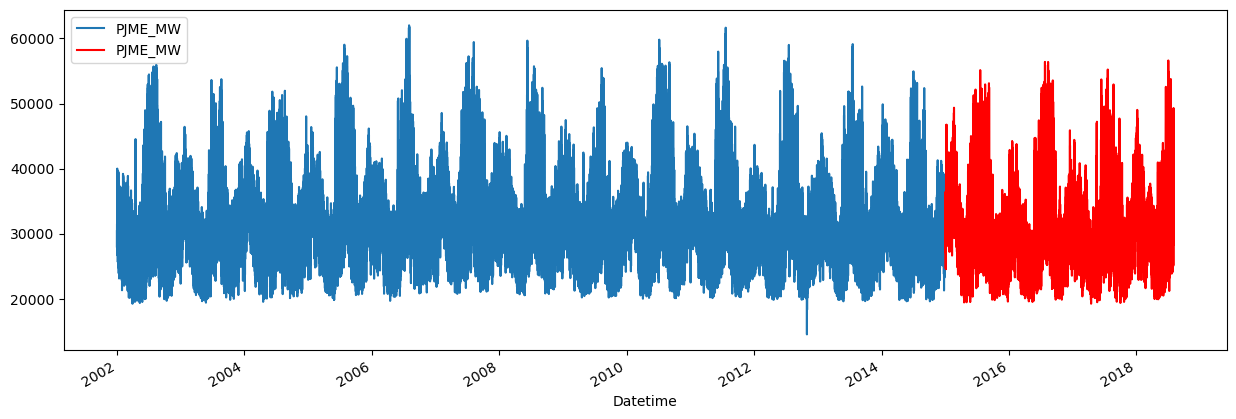

In [15]:
fig, ax= plt.subplots(figsize=(15,5))
train.plot(ax=ax)
test.plot(ax=ax,color='red')


<AxesSubplot:xlabel='Datetime'>

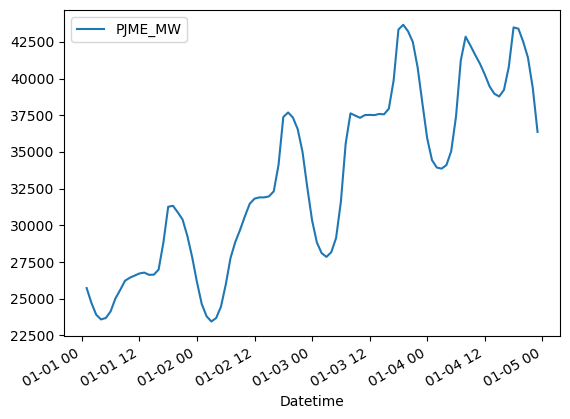

In [16]:
df.loc[(df.index>'01-01-2012') & (df.index<'01-05-2012')].plot()

In [22]:
# feature creation
def create_features(df):
    df['hour']=df.index.hour
    df['dayofweek']=df.index.dayofweek
    df['quarter']=df.index.quarter
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    return df


In [23]:
df=create_features(df)

In [24]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498,1,1,4,12,2002,365
2002-12-31 02:00:00,25147,2,1,4,12,2002,365
2002-12-31 03:00:00,24574,3,1,4,12,2002,365
2002-12-31 04:00:00,24393,4,1,4,12,2002,365
2002-12-31 05:00:00,24860,5,1,4,12,2002,365


In [25]:
import seaborn as sns


<AxesSubplot:xlabel='dayofweek', ylabel='PJME_MW'>

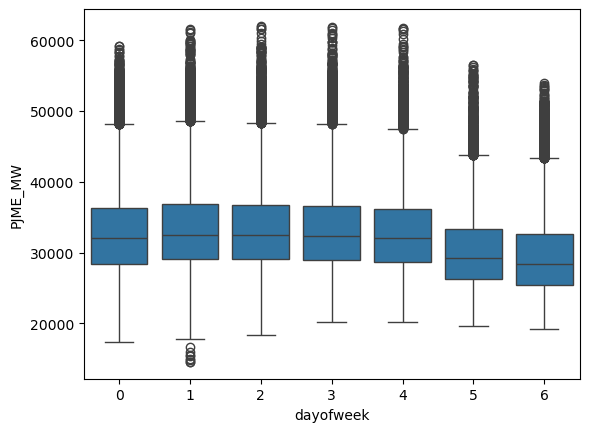

In [26]:
sns.boxplot(data=df, x='dayofweek', y='PJME_MW')

In [27]:
train=create_features(train)
test=create_features(test)

C:\Users\RISHI\AppData\Local\Temp\ipykernel_9456\3514467499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=df.index.hour
C:\Users\RISHI\AppData\Local\Temp\ipykernel_9456\3514467499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek']=df.index.dayofweek
C:\Users\RISHI\AppData\Local\Temp\ipykernel_9456\3514467499.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [22]:
FEATURES=['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']

In [23]:
TARGET='PJME_MW'

In [24]:
x_train=train[FEATURES]
y_train=train[TARGET]

In [25]:
x_test=test[FEATURES]
y_test=test[TARGET]

In [26]:
reg=xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=.01)

In [27]:
reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], verbose=True)

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[1]	validation_0-rmse:32279.88735	validation_1-rmse:31332.60350
[2]	validation_0-rmse:31961.14360	validation_1-rmse:31014.27357
[3]	validation_0-rmse:31645.62525	validation_1-rmse:30699.10021
[4]	validation_0-rmse:31333.30788	validation_1-rmse:30385.92606
[5]	validation_0-rmse:31024.14316	validation_1-rmse:30075.82644
[6]	validation_0-rmse:30718.10796	validation_1-rmse:29769.05547
[7]	validation_0-rmse:30415.17979	validation_1-rmse:29465.13991


C:\Users\RISHI\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\RISHI\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\RISHI\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\RISHI\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\RI

[8]	validation_0-rmse:30115.31200	validation_1-rmse:29164.62813
[9]	validation_0-rmse:29818.48171	validation_1-rmse:28866.85195
[10]	validation_0-rmse:29524.66621	validation_1-rmse:28571.74321
[11]	validation_0-rmse:29233.82326	validation_1-rmse:28280.36822
[12]	validation_0-rmse:28945.84624	validation_1-rmse:27991.28725
[13]	validation_0-rmse:28660.79477	validation_1-rmse:27705.25177
[14]	validation_0-rmse:28378.63482	validation_1-rmse:27422.93837
[15]	validation_0-rmse:28099.33236	validation_1-rmse:27143.92464
[16]	validation_0-rmse:27822.84963	validation_1-rmse:26868.12183
[17]	validation_0-rmse:27549.18163	validation_1-rmse:26594.10708
[18]	validation_0-rmse:27278.35592	validation_1-rmse:26324.22010
[19]	validation_0-rmse:27010.19574	validation_1-rmse:26056.64285
[20]	validation_0-rmse:26744.75390	validation_1-rmse:25791.24419
[21]	validation_0-rmse:26481.98709	validation_1-rmse:25528.96034
[22]	validation_0-rmse:26221.92594	validation_1-rmse:25268.66067
[23]	validation_0-rmse:2596

[135]	validation_0-rmse:8979.33354	validation_1-rmse:8329.68884
[136]	validation_0-rmse:8900.82328	validation_1-rmse:8257.61035
[137]	validation_0-rmse:8823.16493	validation_1-rmse:8187.47943
[138]	validation_0-rmse:8746.40369	validation_1-rmse:8117.30033
[139]	validation_0-rmse:8670.69319	validation_1-rmse:8044.94586
[140]	validation_0-rmse:8595.30150	validation_1-rmse:7974.50892
[141]	validation_0-rmse:8521.03848	validation_1-rmse:7903.61734
[142]	validation_0-rmse:8447.53338	validation_1-rmse:7838.11931
[143]	validation_0-rmse:8374.94976	validation_1-rmse:7774.67895
[144]	validation_0-rmse:8303.17301	validation_1-rmse:7706.53824
[145]	validation_0-rmse:8232.44288	validation_1-rmse:7638.86489
[146]	validation_0-rmse:8162.29554	validation_1-rmse:7576.95655
[147]	validation_0-rmse:8092.84760	validation_1-rmse:7513.34253
[148]	validation_0-rmse:8024.43775	validation_1-rmse:7449.51216
[149]	validation_0-rmse:7956.64073	validation_1-rmse:7391.09490
[150]	validation_0-rmse:7889.60497	valid

[264]	validation_0-rmse:3798.97077	validation_1-rmse:4048.14058
[265]	validation_0-rmse:3782.79682	validation_1-rmse:4039.45958
[266]	validation_0-rmse:3767.96005	validation_1-rmse:4030.05158
[267]	validation_0-rmse:3753.73564	validation_1-rmse:4021.88378
[268]	validation_0-rmse:3739.05516	validation_1-rmse:4013.20004
[269]	validation_0-rmse:3724.68055	validation_1-rmse:4004.95299
[270]	validation_0-rmse:3710.68657	validation_1-rmse:3995.70681
[271]	validation_0-rmse:3696.70657	validation_1-rmse:3986.84710
[272]	validation_0-rmse:3683.49757	validation_1-rmse:3979.95132
[273]	validation_0-rmse:3670.05808	validation_1-rmse:3972.68158
[274]	validation_0-rmse:3656.95951	validation_1-rmse:3965.83605
[275]	validation_0-rmse:3643.77029	validation_1-rmse:3958.72576
[276]	validation_0-rmse:3630.77267	validation_1-rmse:3950.43116
[277]	validation_0-rmse:3618.06606	validation_1-rmse:3943.25957
[278]	validation_0-rmse:3606.06592	validation_1-rmse:3937.15492
[279]	validation_0-rmse:3594.02930	valid

[393]	validation_0-rmse:2906.62094	validation_1-rmse:3717.37200
[394]	validation_0-rmse:2903.57242	validation_1-rmse:3717.49762
[395]	validation_0-rmse:2900.99520	validation_1-rmse:3717.56557
[396]	validation_0-rmse:2896.24892	validation_1-rmse:3716.95968
[397]	validation_0-rmse:2894.50112	validation_1-rmse:3716.66088
[398]	validation_0-rmse:2889.88620	validation_1-rmse:3716.12758
[399]	validation_0-rmse:2887.30360	validation_1-rmse:3716.23487
[400]	validation_0-rmse:2884.85132	validation_1-rmse:3716.33146
[401]	validation_0-rmse:2883.12559	validation_1-rmse:3715.93142
[402]	validation_0-rmse:2879.50094	validation_1-rmse:3716.33798
[403]	validation_0-rmse:2877.95273	validation_1-rmse:3716.07333
[404]	validation_0-rmse:2874.45734	validation_1-rmse:3716.77440
[405]	validation_0-rmse:2872.80403	validation_1-rmse:3716.38266
[406]	validation_0-rmse:2869.47533	validation_1-rmse:3717.06338
[407]	validation_0-rmse:2865.36620	validation_1-rmse:3717.10343
[408]	validation_0-rmse:2863.15014	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
reg.feature_importances_

array([0.44880438, 0.1586678 , 0.03331862, 0.22815645, 0.02263376,
       0.10841895], dtype=float32)

In [29]:
#forecating on test data
test['prediction']=reg.predict(x_test)

C:\Users\RISHI\anaconda3\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\RISHI\anaconda3\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\RISHI\anaconda3\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\RISHI\anaconda3\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\Users\RI

In [30]:
test

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction
Datetime,,,,,,,,
2015-01-01 00:00:00,32802,0,3,1,1,2015,1,31861.591797
2015-12-31 01:00:00,24305,1,3,4,12,2015,365,28268.078125
2015-12-31 02:00:00,23156,2,3,4,12,2015,365,27164.314453
2015-12-31 03:00:00,22514,3,3,4,12,2015,365,26900.753906
2015-12-31 04:00:00,22330,4,3,4,12,2015,365,26900.753906
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284,20,0,1,1,2018,1,36855.925781
2018-01-01 21:00:00,43751,21,0,1,1,2018,1,36690.816406
2018-01-01 22:00:00,42402,22,0,1,1,2018,1,34941.773438


<AxesSubplot:xlabel='Datetime'>

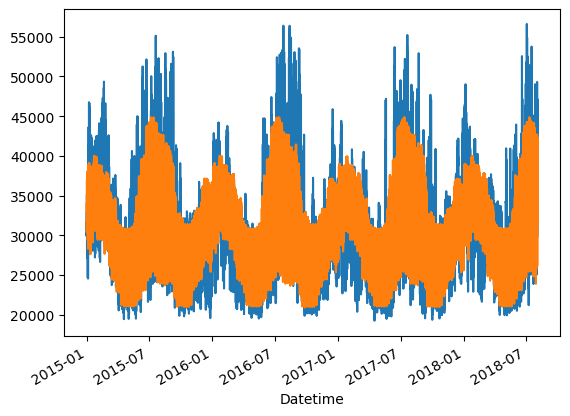

In [31]:
test['PJME_MW'].plot()
test['prediction'].plot()

<AxesSubplot:xlabel='Datetime'>

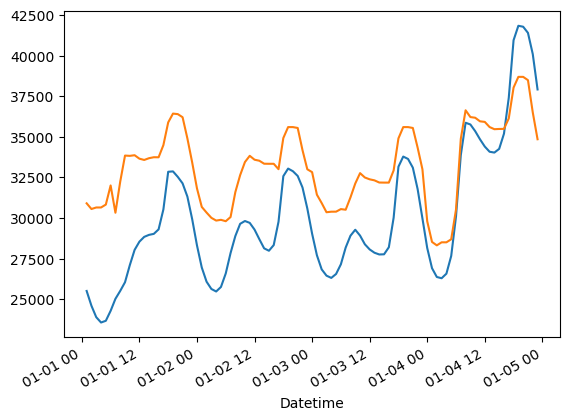

In [32]:
test.loc[(test.index>'01-01-2016') & (test.index<'01-05-2016')]['PJME_MW'].plot()
test.loc[(test.index>'01-01-2016') & (test.index<'01-05-2016')]['prediction'].plot()